In [2]:
import pandas as pd


In [15]:
hdb_resale_data = pd.read_csv("data/processed/hdb_resale_data_final.csv", index_col=0)

In [16]:
hdb_resale_data.shape

(249857, 13)

In [17]:
hdb_resale_data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,num_mrts_within_1km,min_dist_to_mrt_km
_id,,,,,,,,,,,,,
1,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,1,0.352915
2,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,0,0.816023
3,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,1,0.229604
4,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,1,0.664472
5,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0,0,0.923402


In [18]:
hdb_resale_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249857 entries, 1 to 212704
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                249857 non-null  object 
 1   town                 249857 non-null  object 
 2   flat_type            249857 non-null  object 
 3   block                249857 non-null  object 
 4   street_name          249857 non-null  object 
 5   storey_range         249857 non-null  object 
 6   floor_area_sqm       249857 non-null  float64
 7   flat_model           249857 non-null  object 
 8   lease_commence_date  249857 non-null  int64  
 9   remaining_lease      249857 non-null  int64  
 10  resale_price         249857 non-null  float64
 11  num_mrts_within_1km  249857 non-null  int64  
 12  min_dist_to_mrt_km   249857 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 26.7+ MB


In [26]:
numerical_features = hdb_resale_data.select_dtypes(include=['int64', 'float64']).reset_index(drop=True)

numerical_features.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,249857.0,96.870696,24.057105,31.000000,80.000000,93.000000,112.000000,3.667000e+02
lease_commence_date,249857.0,1995.555342,13.937465,1966.000000,1985.000000,1996.000000,2006.000000,2.022000e+03
remaining_lease,249857.0,73.899823,13.734075,40.000000,63.000000,73.000000,86.000000,9.700000e+01
resale_price,249857.0,506457.831953,179415.160650,140000.000000,375000.000000,470000.000000,608000.000000,1.658888e+06
num_mrts_within_1km,249857.0,0.632566,0.714089,0.000000,0.000000,1.000000,1.000000,6.000000e+00
min_dist_to_mrt_km,249857.0,0.774630,0.437265,0.037148,0.457164,0.691146,0.991647,3.594500e+00


In [27]:
categorical_features = hdb_resale_data.select_dtypes(include=['object']).reset_index(drop=True)

categorical_features.describe().T

,count,unique,top,freq
month,249857,127,2024-07,3036
town,249857,26,SENGKANG,20086
flat_type,249857,7,4 ROOM,105192
block,249857,2745,2,801
street_name,249857,576,YISHUN RING RD,3665
storey_range,249857,17,04 TO 06,57777
flat_model,249857,21,Model A,86782


In [31]:
numerical_features.isnull().sum()

floor_area_sqm         0
lease_commence_date    0
remaining_lease        0
resale_price           0
num_mrts_within_1km    0
min_dist_to_mrt_km     0
dtype: int64

In [29]:
categorical_features.isnull().sum()

month           0
town            0
flat_type       0
block           0
street_name     0
storey_range    0
flat_model      0
dtype: int64

In [40]:
hdb_resale_data['resale_price']

_id
1          255000.0
2          275000.0
3          285000.0
4          290000.0
5          290000.0
            ...    
212700     975000.0
212701    1000000.0
212702     980000.0
212703     945000.0
212704    1095000.0
Name: resale_price, Length: 249857, dtype: float64

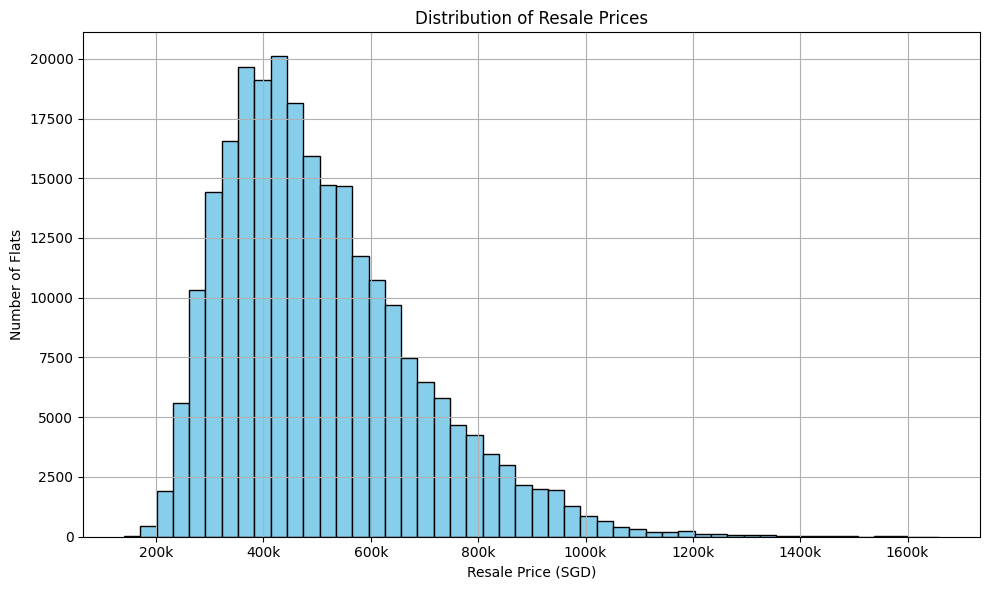

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Formatter function to display values in 'k'
def thousands_formatter(x, pos):
    return f'{int(x/1000)}k'

plt.figure(figsize=(10, 6))
plt.hist(hdb_resale_data['resale_price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Resale Prices')
plt.xlabel('Resale Price (SGD)')
plt.ylabel('Number of Flats')
plt.grid(True)

# Apply the formatter to x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.tight_layout()
plt.show()
